# Time Series Data in Pandas

# Indexing Time Series Data

Date Times in datetime objects.

read_csv can read strings into datetimes.

- Parse_dates = True
- index_col = 'Date'
    - very useful for datetime exploration
    



ISO 8601 format - yyyy-mm-dd hh:mm:ss

Loc
- sales.loc['2-1002-19 11:00:00', 'Company']

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('./data/sales-feb-2015.csv',
                    parse_dates=True,
                    index_col='Date')

In [44]:
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [46]:
# Sample loc

# select specific date/time
sales.loc['2015-02-16 12:09:19', 'Company']

# Partial datetime string selection
# select specific day
sales.loc['2015-2-5']

sales.loc['February 5, 2015']

sales.loc['2015-Feb-5']

# Select whole months
sales.loc['2015-2']

# select whole year
sales.loc['2015']




,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-09 08:57:30,Streeplex,Service,19
2015-02-11 20:03:08,Initech,Software,7
2015-02-04 21:52:45,Acme Coporation,Hardware,14


Slicing Using Dates/Times

In [47]:
sales.loc['2015-2-16':'2015-2-20']


,Company,Product,Units
Date,,,
2015-02-16 12:09:19,Hooli,Software,10
2015-02-19 16:02:58,Mediacore,Service,10
2015-02-19 10:59:33,Mediacore,Hardware,16


#### pd.to_datetime() object

Changes text in  iso8601 format into datetime objects

In [48]:
evening_2_11 = pd.to_datetime(['2015-2-11'])

#### Reindexing Dataframe

provides a new index with matching data
creates new dataframe

Default = blank dates fill with NaN
ffill = forwad fill NaN with data
bfill = back fill NaN with data



In [49]:
# override default of fillinging with NaN
# ffill = forward fill
# bfill = back fill

sales.reindex(evening_2_11, method='ffill')



ValueError: index must be monotonic increasing or decreasing

#### Creating and using a DatetimeIndex

The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the pd.to_datetime() function for just this task. For example, if passed the list of strings ['2015-01-01 091234','2015-01-01 091234'] and a format specification variable, such as format='%Y-%m-%d %H%M%S, pandas will parse the string into the proper datetime elements and build the datetime objects.

In this exercise, a list of temperature data and a list of date strings has been pre-loaded for you as temperature_list and date_list respectively. Your job is to use the .to_datetime() method to build a DatetimeIndex out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

In [50]:
import pandas as pd

In [51]:
temperature_list = [47.8,
                 47.2,
                 46.5,
                 46.2,
                 45.7,
                 46.0,
                 45.2,
                 46.0,
                 49.4,
                 52.7,
                 55.7,
                 58.0,
                 60.0,
                 61.4,
                 62.3]

In [52]:
date_list = ['20100211 01:00',
             '20100211 02:00',
             '20100211 03:00',
             '20100211 04:00',
             '20100211 05:00',
             '20100211 06:00',
             '20100211 07:00',
             '20100211 08:00',
             '20100211 09:00',
             '20100211 10:00',
             '20100211 11:00',
             '20100211 12:00',
             '20100211 13:00',
             '20100211 14:00',
             '20100211 15:00']

Next to DataFrames, Series are another important object that pandas allows us to create, and they're very convenient for time series data

In [53]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)



In [54]:
# series with datetime as index

time_series

2010-02-11 01:00:00    47.8
2010-02-11 02:00:00    47.2
2010-02-11 03:00:00    46.5
2010-02-11 04:00:00    46.2
2010-02-11 05:00:00    45.7
2010-02-11 06:00:00    46.0
2010-02-11 07:00:00    45.2
2010-02-11 08:00:00    46.0
2010-02-11 09:00:00    49.4
2010-02-11 10:00:00    52.7
2010-02-11 11:00:00    55.7
2010-02-11 12:00:00    58.0
2010-02-11 13:00:00    60.0
2010-02-11 14:00:00    61.4
2010-02-11 15:00:00    62.3
dtype: float64

#### Partial string indexing and slicing

Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In this exercise, a time series that contains hourly weather data has been pre-loaded for you. This data was read using the parse_dates=True option in read_csv() with index_col="Dates" so that the Index is indeed a DatetimeIndex.

All data from the 'Temperature' column has been extracted into the variable ts0. Your job is to use a variety of natural date strings to extract one or more values from ts0.

After you are done, you will have three new variables - ts1, ts2, and ts3. You can slice these further to extract only the first and last entries of each. Try doing this after your submission for more practice.

In [55]:
weather = pd.read_csv('./data/weather_data_austin_2010.csv',
                      parse_dates=True, index_col='Date')

In [56]:
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [57]:
ts0 = weather.loc[:, 'Temperature']

In [58]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']

In [59]:
ts1

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
Name: Temperature, dtype: float64

In [60]:
ts2

Date
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
2010-07-04 05:00:00    74.2
2010-07-04 06:00:00    74.4
2010-07-04 07:00:00    76.0
2010-07-04 08:00:00    79.0
2010-07-04 09:00:00    81.8
2010-07-04 10:00:00    84.6
2010-07-04 11:00:00    86.8
2010-07-04 12:00:00    88.9
2010-07-04 13:00:00    90.1
2010-07-04 14:00:00    91.1
2010-07-04 15:00:00    91.6
2010-07-04 16:00:00    91.5
2010-07-04 17:00:00    90.7
2010-07-04 18:00:00    89.5
2010-07-04 19:00:00    87.3
2010-07-04 20:00:00    84.0
2010-07-04 21:00:00    81.8
2010-07-04 22:00:00    80.0
2010-07-04 23:00:00    78.5
Name: Temperature, dtype: float64

In [61]:
ts3

Date
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
2010-12-15 05:00:00    45.3
2010-12-15 06:00:00    45.6
2010-12-15 07:00:00    45.0
2010-12-15 08:00:00    45.8
2010-12-15 09:00:00    49.1
2010-12-15 10:00:00    52.2
2010-12-15 11:00:00    54.9
2010-12-15 12:00:00    57.2
2010-12-15 13:00:00    58.9
2010-12-15 14:00:00    60.2
2010-12-15 15:00:00    60.9
2010-12-15 16:00:00    60.5
2010-12-15 17:00:00    59.1
2010-12-15 18:00:00    55.8
2010-12-15 19:00:00    52.5
2010-12-15 20:00:00    50.7
2010-12-15 21:00:00    49.6
2010-12-15 22:00:00    48.6
2010-12-15 23:00:00    47.7
2010-12-16 00:00:00    47.6
2010-12-16 01:00:00    46.7
2010-12-16 02:00:00    46.1
2010-12-16 03:00:00    45.6
2010-12-16 04:00:00    45.2
2010-12-16 05:00:00    44.8
                       ... 
2010-12-30 18:00:00    54.1
2010-12-30 19:00:00    50.9
2010-12-30 20:00:00    49.0
2010-12-30 21:00:00    47.9
2010-12-30 22:0

#### Reindexing the Index

Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, ts1, includes weekends, but the second, ts2, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

- Create a new time series ts3 by reindexing ts2 with the index of ts1. To do this, call .reindex() on ts2 and pass in the index of ts1 (ts1.index).
- Create another new time series, ts4, by calling the same .reindex() as above, but also specifiying a fill method, using the keyword argument method="ffill" to forward-fill values.
- Add ts1 + ts2. Assign the result to sum12.
- Add ts1 + ts3. Assign the result to sum13.
- Add ts1 + ts4, Assign the result to sum14.

In [62]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4

In [63]:
sum12

Date
2010-07-04 00:00:00   NaN
2010-07-04 01:00:00   NaN
2010-07-04 02:00:00   NaN
2010-07-04 03:00:00   NaN
2010-07-04 04:00:00   NaN
2010-07-04 05:00:00   NaN
2010-07-04 06:00:00   NaN
2010-07-04 07:00:00   NaN
2010-07-04 08:00:00   NaN
2010-07-04 09:00:00   NaN
2010-07-04 10:00:00   NaN
2010-07-04 11:00:00   NaN
2010-07-04 12:00:00   NaN
2010-07-04 13:00:00   NaN
2010-07-04 14:00:00   NaN
2010-07-04 15:00:00   NaN
2010-07-04 16:00:00   NaN
2010-07-04 17:00:00   NaN
2010-07-04 18:00:00   NaN
2010-07-04 19:00:00   NaN
2010-07-04 20:00:00   NaN
2010-07-04 21:00:00   NaN
2010-07-04 22:00:00   NaN
2010-07-04 23:00:00   NaN
2010-10-11 21:00:00   NaN
2010-10-11 22:00:00   NaN
Name: Temperature, dtype: float64

Understanding how indexing and reindexing works is a valuable skill.



# Resampling Time Series Data

Use Statistical methods computed over different time intervals.
- Mean, Sum, Count, etc..
- Aggregating Means
- D = Daily
- Method Chaining - chain with the Mean method.  Best practice to chain a statistic

Downsampling
- reduce datetime rows to slower frequency
- going from Daily to Weekly

Upsampling
- increase datetime rows to faster frequency
- going from Daily to Hourly
- chain ffill() or bfill()

Common Resampling intervals:
- 'min', 'T' = minute
- 'H'
- 'D'
- 'B' = Business Day
- 'W'
- 'M' 
- 'Q'
- 'A'

You can use multiple freqencies with integers
- for example, '2W' = resample every 2 week intervals

Rolling Method
- very similar to Moving Averages
- rolling()
- you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. 
    - For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

In [81]:
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


## Downsampling

In [82]:
# Returns Daily frequency with the average # of unit sold each day
# Aggregating Means
# D = Daily
# Chained with the Mean method.  Best practice to chain a statistic

daily_mean = sales.resample('D').mean()

daily_mean.head()

,Units
Date,
2015-02-02,6.0
2015-02-03,13.0
2015-02-04,13.5
2015-02-05,14.5
2015-02-06,NaN


Notice missing days are filled with NaN - this can be changed

In [83]:
# Gives you daily totals

sales.resample('D').sum().head()

,Units
Date,
2015-02-02,12.0
2015-02-03,13.0
2015-02-04,27.0
2015-02-05,29.0
2015-02-06,NaN


#### Method Chaining

Multiple Chaining methods

In [84]:
# Max total in any day in February

sales.resample('D').sum().max()

Units    29.0
dtype: float64

In [85]:
# Number of sales each week in February

sales.resample('W').count()

,Company,Product,Units
Date,,,
2015-02-08,8,8,8
2015-02-15,4,4,4
2015-02-22,5,5,5
2015-03-01,3,3,3


#### Multiplying Frequencies

In [86]:
# Total number of sales in 2 week intervals

sales.loc[:, 'Units'].resample('2W').sum()

Date
2015-02-08    82
2015-02-22    79
2015-03-08    15
Freq: 2W-SUN, Name: Units, dtype: int64

## Upsampling

exp: upsampling from daily to hourly
- or hourly to minute

In [87]:
two_days = sales.loc['2015-2-4': '2015-2-5', 'Units']

In [88]:
two_days

Date
2015-02-05 01:53:06    19
2015-02-04 21:52:45    14
2015-02-05 22:05:03    10
2015-02-04 15:36:29    13
Name: Units, dtype: int64

In [89]:
# resample every 4 hours
# Chain ffill() with forward fill method, or Interpolation

two_days.resample('4H').ffill()

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

#### Resampling and frequency

Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - df.method1().method2().method3() - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in df.resample('D').mean().

In this exercise, a data set containing hourly temperature data has been pre-loaded for you. Your job is to resample the data using a variety of aggregation methods to answer a few questions.

In [91]:
df = weather

In [96]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df.loc[:, 'Temperature'].resample('6H').mean()

df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [98]:
# Downsample to daily data and count the number of data points: df2
df2 = df.loc[:, 'Temperature'].resample('D').count()

df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

#### Separating and resampling

With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations. In this exercise, the data set containing hourly temperature data from the last exercise has been pre-loaded.

Your job is to resample the data using a variety of aggregation methods. The DataFrame is available in the workspace as df. You will be working with the 'Temperature' column.

In [107]:
august = df['2010-08'].loc[:, 'Temperature']

In [108]:
august_highs = august.resample('D').max()

august_highs

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [110]:
# Extract temperature data for February: february
february = df['2010-02'].loc[: ,'Temperature']

In [111]:
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

february_lows

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
2010-02-06    44.1
2010-02-07    44.3
2010-02-08    44.7
2010-02-09    44.7
2010-02-10    44.9
2010-02-11    45.2
2010-02-12    45.5
2010-02-13    46.0
2010-02-14    46.6
2010-02-15    46.9
2010-02-16    47.1
2010-02-17    47.2
2010-02-18    47.2
2010-02-19    47.4
2010-02-20    47.7
2010-02-21    47.6
2010-02-22    47.7
2010-02-23    47.7
2010-02-24    48.1
2010-02-25    48.4
2010-02-26    48.5
2010-02-27    48.6
2010-02-28    48.6
Freq: D, Name: Temperature, dtype: float64

#### Rolling mean and frequency with .rolling() method

In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them here.

To use the .rolling() method, you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

Your job is to resample the data using the combination of .rolling() and .mean(). You will work with the same DataFrame df from the previous exercise.

In [117]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

unsmoothed.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [124]:
# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

smoothed[24:36]

Date
2010-08-02 00:00:00    84.354167
2010-08-02 01:00:00    84.354167
2010-08-02 02:00:00    84.358333
2010-08-02 03:00:00    84.362500
2010-08-02 04:00:00    84.366667
2010-08-02 05:00:00    84.366667
2010-08-02 06:00:00    84.370833
2010-08-02 07:00:00    84.375000
2010-08-02 08:00:00    84.375000
2010-08-02 09:00:00    84.375000
2010-08-02 10:00:00    84.370833
2010-08-02 11:00:00    84.375000
Freq: H, Name: Temperature, dtype: float64

In [119]:
# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

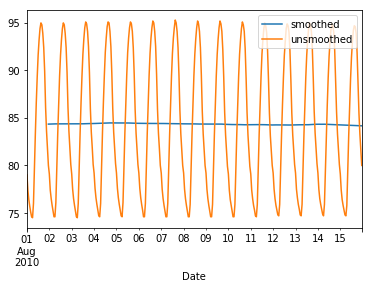

In [129]:
# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

#### Resample and roll with it

As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a groupby (If you do not know what a groupby is, don't worry, you will learn about it in the next course!).

You can now flexibly chain together resampling and rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

In [133]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-8']

In [135]:
# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

In [136]:
# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64
